# Project : Diabetes Prediction modeling with recored dataset in csv format

In [30]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')

In [31]:
#importing the diabetes dataset
df = pd.read_csv('diabetes_prediction_dataset.csv')

In [32]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [33]:
df.shape

(100000, 9)

In [34]:
#analysing the first 5 rows of our dataset
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [35]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


Variable Identification :

In [36]:
df.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

Our target variable is 'diabetes' which has two outputs, 0 for 'No' and 1 for 'yes'
Also our target variable is already numerical

Univariate Analysis

<Axes: xlabel='diabetes', ylabel='Density'>

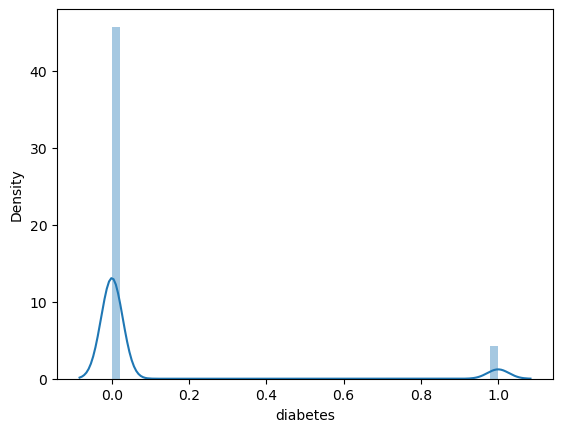

In [37]:
#univariate analysis of our target variable
sn.distplot(df['diabetes'])


We can say that the people mostly do not have diabetes and very few people look affected by it

<Axes: >

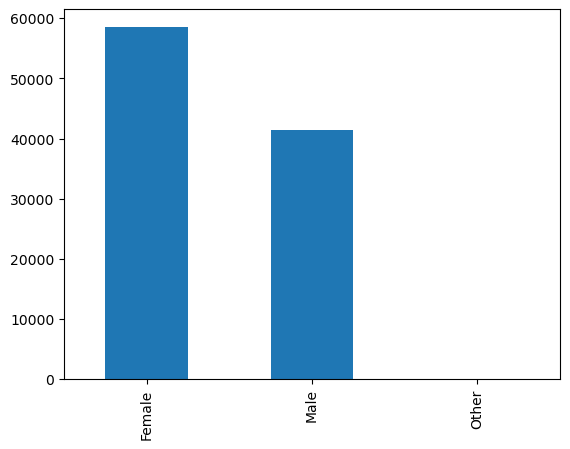

In [38]:
df['gender'].value_counts().plot.bar()

We can infer that Females are more affected by this medical condition compared to male


<Axes: xlabel='age', ylabel='Density'>

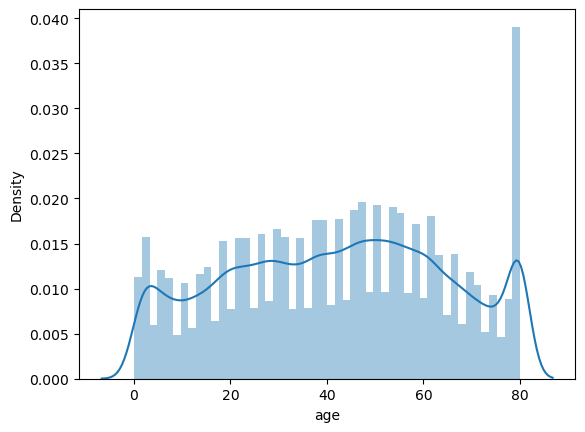

In [39]:
sn.distplot(df['age'])

We can infer that people belonging to age around 80 have the highest chances of catching this disease

<Axes: >

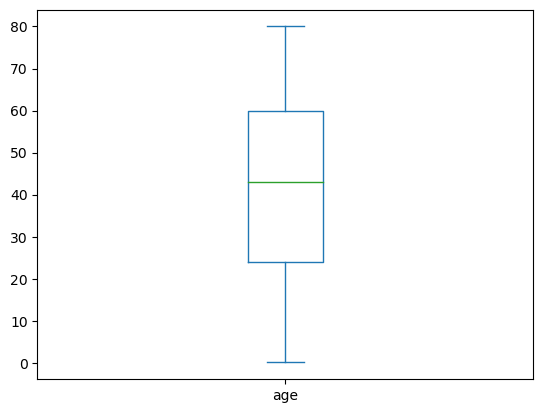

In [40]:
df['age'].plot.box()

Bivariate Analysis

<Axes: >

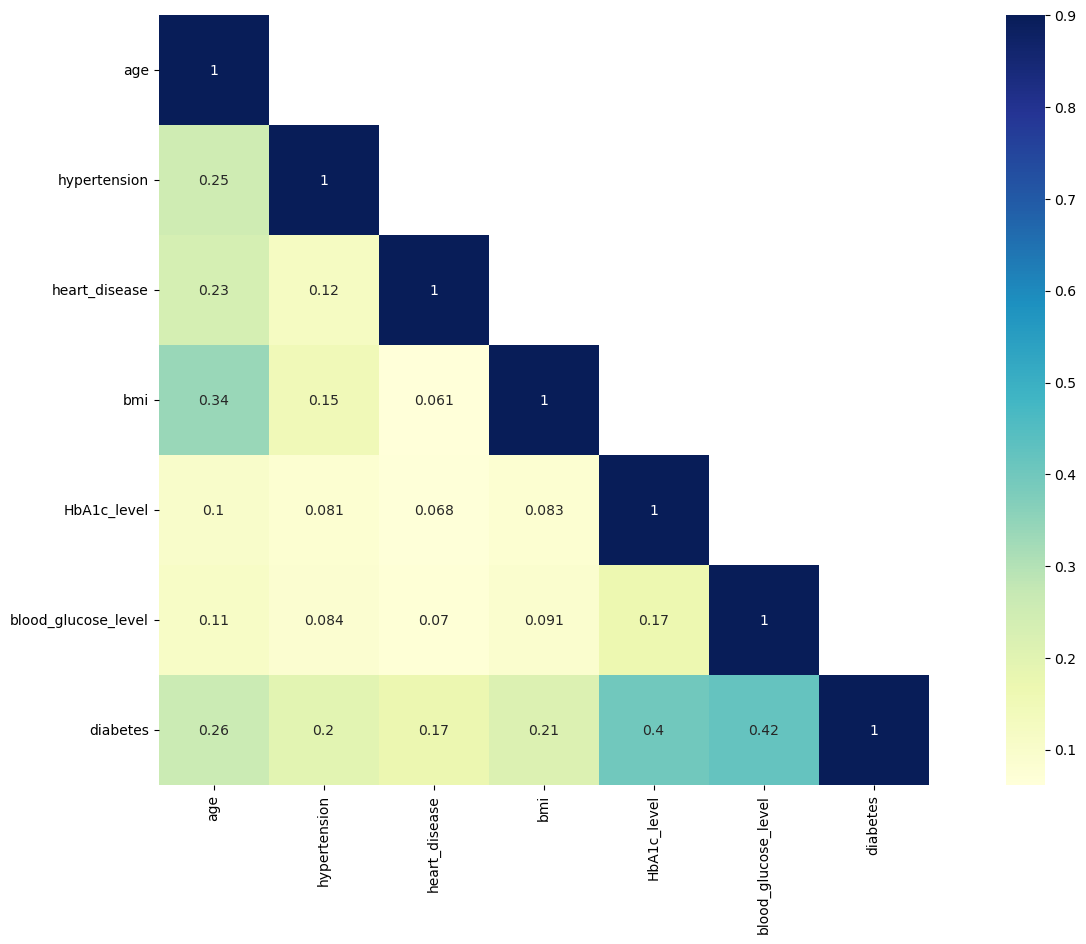

In [41]:
#storing the correlation in corr variable
corr = df.corr()
#converting the corr variable values into an array called mask
mask = np.array(corr)
#The purpose of masking out the lower triangular part is to avoid redundant information in the heatmap. 
#In correlation matrices, the diagonal and lower triangular elements are mirror images of the upper triangular elements.
#By masking out the lower triangular part, we only display the meaningful and unique values of the correlation matrix in the heatmap, improving the clarity and visual representation of the data.
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
#This code below sets the size of the figure to have a width of 20 inches and a height of 10 inches.
fig.set_size_inches(20,10)

sn.heatmap(corr, mask=mask,vmax=.9, square=True,annot=True, cmap="YlGnBu")
#corr: The correlation matrix to be visualized.
#mask: The mask to hide the lower triangular part of the heatmap.
#vmax: The maximum value for the color scale. Correlation coefficients above this value will have the same color.
#square: Setting this to True makes the heatmap cells square-shaped, creating a grid-like appearance.
#annot: Setting this to True adds numeric annotations to each cell, displaying the correlation coefficient values on the heatmap.
#cmap: The colormap to be used for the heatmap. In this case, "YlGnBu" represents a yellow-green-blue colormap, which is used to represent the correlation values.

<Axes: >

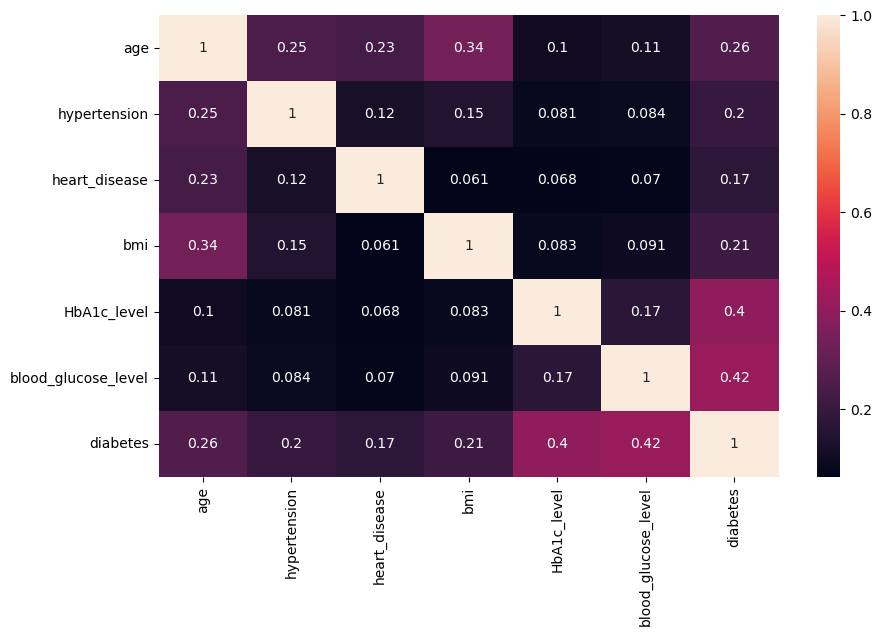

In [42]:
plt.figure(figsize=(10,6))
sn.heatmap(df.corr(), annot=True)

we can infer and say that blood_glucose_level has the highest correlation with our target variable and HbA1c_level as well has a really good correlation

In [43]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

We can see that there are no missing values hence no missing value treatment is needed

# Model Building

In [44]:
x_target = df['diabetes']
#storing the target variable in x_target

In [45]:
train= df.drop('diabetes',1)

In [46]:
train

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,Female,80.0,0,1,never,25.19,6.6,140
1,Female,54.0,0,0,No Info,27.32,6.6,80
2,Male,28.0,0,0,never,27.32,5.7,158
3,Female,36.0,0,0,current,23.45,5.0,155
4,Male,76.0,1,1,current,20.14,4.8,155
...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90
99996,Female,2.0,0,0,No Info,17.37,6.5,100
99997,Male,66.0,0,0,former,27.83,5.7,155
99998,Female,24.0,0,0,never,35.42,4.0,100


We can see that we dropped the target variable from the train data set and store it in another variable called x_target, lets check it

In [47]:
x_target

0        0
1        0
2        0
3        0
4        0
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: diabetes, Length: 100000, dtype: int64

As the sklearn models takes only numerical input, we will convert the categorical variables into numerical values using dummies.

In [48]:
train = pd.get_dummies(train)

In [49]:
train

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_Female,gender_Male,gender_Other,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80.0,0,1,25.19,6.6,140,1,0,0,0,0,0,0,1,0
1,54.0,0,0,27.32,6.6,80,1,0,0,1,0,0,0,0,0
2,28.0,0,0,27.32,5.7,158,0,1,0,0,0,0,0,1,0
3,36.0,0,0,23.45,5.0,155,1,0,0,0,1,0,0,0,0
4,76.0,1,1,20.14,4.8,155,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,80.0,0,0,27.32,6.2,90,1,0,0,1,0,0,0,0,0
99996,2.0,0,0,17.37,6.5,100,1,0,0,1,0,0,0,0,0
99997,66.0,0,0,27.83,5.7,155,0,1,0,0,0,0,1,0,0
99998,24.0,0,0,35.42,4.0,100,1,0,0,0,0,0,0,1,0


In [50]:
from sklearn.model_selection import train_test_split

So we import the function needed to split our data test into test and train dataset

In [61]:
x_train, x_test, y_train, y_test = train_test_split(train, x_target, test_size = 0.2)

# Now we apply Logistic Regression

In [62]:
from sklearn.linear_model import LogisticRegression

In [63]:
lr = LogisticRegression()

In [64]:
lr.fit(x_train, y_train)

LogisticRegression()

Our model has been fitted now we make predictions

In [67]:
pred  = lr.predict (x_test)

In [68]:
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

 Evaluation metrics

In [69]:
from sklearn.metrics import accuracy_score

In [71]:
#calculating the accuracy score
accuracy_score(y_test, pred)

0.95425

We got an accuracy score of 95% but let us try other algorithms

# Let us try Decision Tree

In [73]:
from sklearn.tree import DecisionTreeClassifier

In [74]:
dt = DecisionTreeClassifier(max_depth = 5)

In [75]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [76]:
predict = dt.predict(x_test)

In [77]:
accuracy_score(y_test,predict)

0.97255

# Linear Regression

In [88]:
from sklearn.linear_model import LinearRegression

In [89]:
linear = LinearRegression()

In [90]:
linear.fit(x_train, y_train)

LinearRegression()

In [91]:
predicts  = linear.predict(x_test)

In [93]:
def rmsle(y, y_):
    y = np.exp(y),   # taking the exponential as we took the log of target variable
    y_ = np.exp(y_)
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

In [94]:
rmsle(y_test, predicts)

0.13656023524346098